# A4-Q3Q4: DCT and JPEG Compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q3: Discrete Cosine Transform

### Some helper functions

In [2]:
def EvenExtension(f):
    '''
     fe = EvenExtension(f)
     
     Performs an even extension on the array f.
    
     Input:
       f is a 2D array
    
     Output:
       fe is the even extension of f
    
     If f has dimensions NxM, then fe has dimensions
        (2*N-2)x(2*M-2)
     and fe[n,j]=fe[-n,j] for n=0,...,N-1
     and fe[n,j]=fe[n,-j] for j=0,...,M-1
    
     For example, if f is 5x4, then fe has dimensions 8x6.
    
     IEvenExtension is the inverse of EvenExtension, so that
        IEvenExtension(EvenExtension(f)) == f
     for any matrix f.
    
    '''

    fe = np.concatenate((f,np.fliplr(f[:,1:-1])), axis=1)
    fe = np.concatenate((fe, np.flipud(fe[1:-1,:])), axis=0)
    return fe

def IEvenExtension(fe):
    '''
     f = IEvenExtension(fe)
    
     Reverses the action of an even extension.
    
     Input:
       fe is a 2D array, assumed to contain an even extension
    
     Output:
       f is the sub-array that was used to generate the extension
    
     If fe has dimensions KxL, then f has dimensions
        ceil((K+1)/2) x ceil((L+1)/2)
     For example, if fe is 8x6, then f is 5x4.
    
     IEvenExtension is the inverse of EvenExtension, so that
        IEvenExtension(EvenExtension(f)) == f
     for any matrix f.
    
    '''

    e_dims = np.array(np.shape(fe))
    dims = np.ceil((e_dims+1.)/2)
    dims = np.array(dims, dtype=int)
    f = fe[:dims[0], :dims[1]]
    return f

In [3]:
# Define a simple 2-D array to play with
f = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]], dtype=float)
print(f)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [4]:
# Even extension
fe = EvenExtension(f)
print(fe)

[[ 1.  2.  3.  4.  3.  2.]
 [ 5.  6.  7.  8.  7.  6.]
 [ 9. 10. 11. 12. 11. 10.]
 [ 5.  6.  7.  8.  7.  6.]]


In [5]:
# Check that it's even, if you don't believe me
n = np.random.randint(np.shape(f)[0])
j = np.random.randint(np.shape(f)[1])
print((n,j))
print(fe[n,j])
print(fe[-n,-j])

(1, 3)
8.0
8.0


In [6]:
# Inverse even extension
g = IEvenExtension(fe)
print(g)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


### `myDCT`

In [ ]:
def myDCT(f):
    '''
     Fdct = myDCT(f)
    
     Computes the 2-D Discrete Cosine Transform of input image f.
     It uses an even extension of f, along with the 2D-DFT.
     This function is the inverse of myIDCT.
    
     Input:
      f is a 2-D array of real values
    
     Output:
      Fdct is a real-valued array the same size as f
    '''

    # YOUR CODE HERE

### `myIDCT`

In [ ]:
def myIDCT(Fdct):
    '''
     f = myIDCT(Fdct)
    
     Computes the 2-D Inverse Discrete Cosine Transform (IDCT) of input
     array Fdct. It uses an even extension of Fdct, along with the 2D-IDFT.
     This function is the inverse of myDCT.
    
     Input:
      Fdct is a 2-D array of real values
    
     Output:
      f is a real-valued array the same size as Fdct
    '''

    # YOUR CODE HERE

## Q4: JPEG Compression

In [7]:
# A couple functions to help you
def NumPixels(f):
    '''
     n = NumPixels(f) returns the total number of elements in the array f.
     
     For example,
       NumPixels( np.ones((5,4)) )
     returns the value 20.
    '''
    return np.prod(np.shape(f))

def Show(g, title=''):
    '''
     Show(g, title='')
     
     Displays the image g as a graylevel image with intensities
     clipped to the range [0,255].
    '''
    plt.imshow(np.clip(g, a_min=0, a_max=255), cmap='gray');
    plt.axis('off');
    plt.title(title);

### `myJPEGCompress`

In [ ]:
def myJPEGCompress(f, T, D):
    '''
     G = myJPEGCompress(f, T, D)
    
     Input
        f is the input image, a 2D array of real numbers
        T is the tile size to break the input image into
        D is the size of the block of Fourier coefficients to keep
          (Bigger values of D result in less loss, but less compression)
    
     Output
        G is the compressed encoding of the image
    
     Example: If f is 120x120, then
    
        G = myJPEGCompress(f, 10, 4)
    
     would return an array (G) of size 48x48.
    '''
    
    G = f # YOUR CODE HERE

    return G

### `myJPEGDecompress`

In [ ]:
def myJPEGDecompress(G, T, D):
    '''
     f = myJPEGDecompress(G, T, D)
    
     Input
        G is the compressed encoding, a 2D array of real numbers
        T is the tile size for reassembling the decompressed image
        D is the size of the blocks of Fourier coefficients that were
          kept when the image was compressed
          (Bigger values of D result in less loss, but less compression)
    
     Output
        f is the decompressed, reconstructed image
    
     Example: If G is 48x48, then
    
        f = myJPEGDecompress(G, 10, 4);
    
     would return an array (f) of size 120x120.
    '''
    
    f = G # YOUR CODE HERE
        
    return f

### Demonstrate Compression

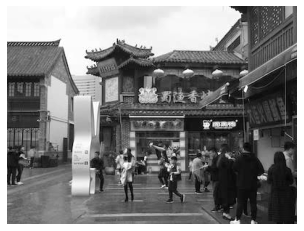

In [8]:
f = plt.imread('Jinan.jpg')[:,:,0]
Show(f)